<a href="https://colab.research.google.com/github/belup/proyectofinalgrupo17/blob/main/Pre_entrega_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRE ENTREGA 4

Tema: Ciberseguridad

En esta ocasión volvemos a usar el dataset de la pre entrega 3 , pero abordandolo desde otro lugar

Objetivo del análisis

El propósito de este trabajo es identificar grupos (clusters) dentro de los ataques cibernéticos detectados, con el fin de comprender patrones comunes, priorizar la respuesta y mejorar la gestión de incidentes.

Para esto, aplicamos técnicas de clustering no supervisado sobre variables como la severidad del ataque, el tiempo de respuesta y otras características relevantes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cibe = pd.read_csv('/content/cybersecurity_large_synthesized_data.csv')


In [ ]:
cibe.head()

,attack_type,target_system,outcome,timestamp,attacker_ip,target_ip,data_compromised_GB,attack_duration_min,security_tools_used,user_role,location,attack_severity,industry,response_time_min,mitigation_method
0,Phishing,Cloud Service,Failure,2024-04-03 11:13:15.083419,21.166.79.4,23.20.50.78,15.31,300,Firewall,Employee,Australia,2,Energy,164,Containment
1,DDoS,Email Server,Success,2024-02-03 20:51:56.083463,187.180.150.169,34.160.58.218,65.05,242,Endpoint Detection,Admin,Brazil,10,Retail,64,Reset Credentials
2,Zero-Day Exploit,Cloud Service,Success,2024-07-19 18:40:05.083472,57.161.159.140,213.142.125.206,48.99,120,Firewall,External User,Germany,7,Finance,87,Quarantine
3,SQL Injection,Email Server,Failure,2023-12-08 00:54:17.083478,207.108.16.104,4.104.193.49,16.29,286,MFA,Employee,Russia,3,Healthcare,23,Patch
4,Zero-Day Exploit,IoT Device,Failure,2024-07-23 05:38:20.083483,98.122.15.31,57.66.53.194,87.66,4,Firewall,Contractor,UK,6,Finance,129,Containment


In [ ]:
cibe.describe() #estadisticas de variables numericas

,data_compromised_GB,attack_duration_min,attack_severity,response_time_min
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.062586,151.070590,5.498990,90.454450
std,28.829756,86.733278,2.869718,51.905376
min,0.000000,1.000000,1.000000,1.000000
25%,25.170000,76.000000,3.000000,46.000000
50%,50.060000,151.000000,5.000000,90.000000
75%,74.970000,226.000000,8.000000,135.000000
max,100.000000,300.000000,10.000000,180.000000


In [ ]:
#estilo de graficos
sns.set_style('whitegrid')

In [ ]:
cibe.isnull().sum() #chequeo nulos

,0
attack_type,0
target_system,0
outcome,0
timestamp,0
attacker_ip,0
target_ip,0
data_compromised_GB,0
attack_duration_min,0
security_tools_used,0
user_role,0


In [ ]:
#valores unicos por columna categorica
for col in cibe.select_dtypes('object'):
  print(f'{col}: {cibe[col].unique()}')

attack_type: ['Phishing' 'DDoS' 'Zero-Day Exploit' 'SQL Injection' 'Malware'
 'Ransomware' 'Brute Force' 'Cross-Site Scripting']
target_system: ['Cloud Service' 'Email Server' 'IoT Device' 'User Account'
 'Network Switch' 'Web Server' 'Database' 'API']
outcome: ['Failure' 'Success']
timestamp: ['2024-04-03 11:13:15.083419' '2024-02-03 20:51:56.083463'
 '2024-07-19 18:40:05.083472' ... '2024-07-29 07:53:22.650690'
 '2024-05-30 11:29:11.650692' '2023-12-27 04:46:54.650695']
attacker_ip: ['21.166.79.4' '187.180.150.169' '57.161.159.140' ... '4.114.70.4'
 '91.200.147.68' '48.80.20.195']
target_ip: ['23.20.50.78' '34.160.58.218' '213.142.125.206' ... '91.165.90.254'
 '221.209.161.150' '235.28.180.232']
security_tools_used: ['Firewall' 'Endpoint Detection' 'MFA' 'VPN' 'Antivirus' 'WAF' 'SIEM'
 'IDS']
user_role: ['Employee' 'Admin' 'External User' 'Contractor']
location: ['Australia' 'Brazil' 'Germany' 'Russia' 'UK' 'France' 'USA' 'Canada'
 'China' 'India']
industry: ['Energy' 'Retail' 'Finan

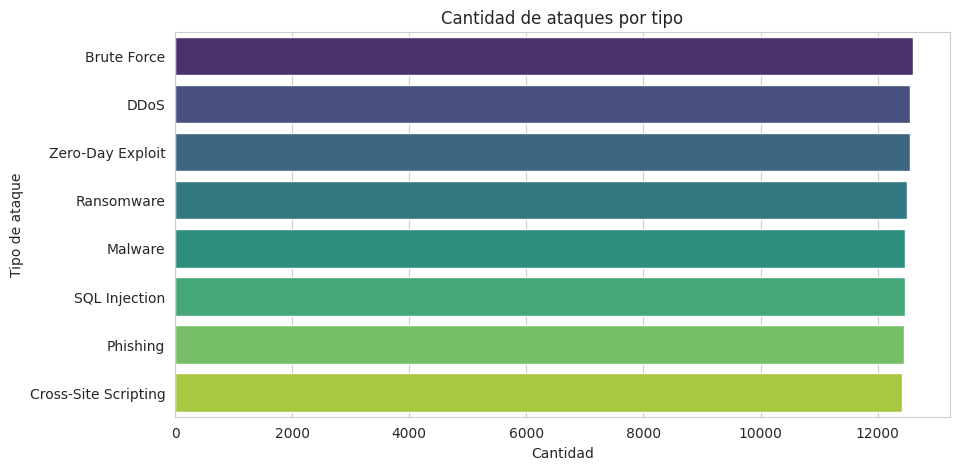

In [ ]:
#tipos de ataque
plt.figure(figsize=(10, 5))
sns.countplot(data=cibe, y='attack_type', order=cibe['attack_type'].value_counts().index, palette='viridis')
plt.title("Cantidad de ataques por tipo")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de ataque")
plt.show()

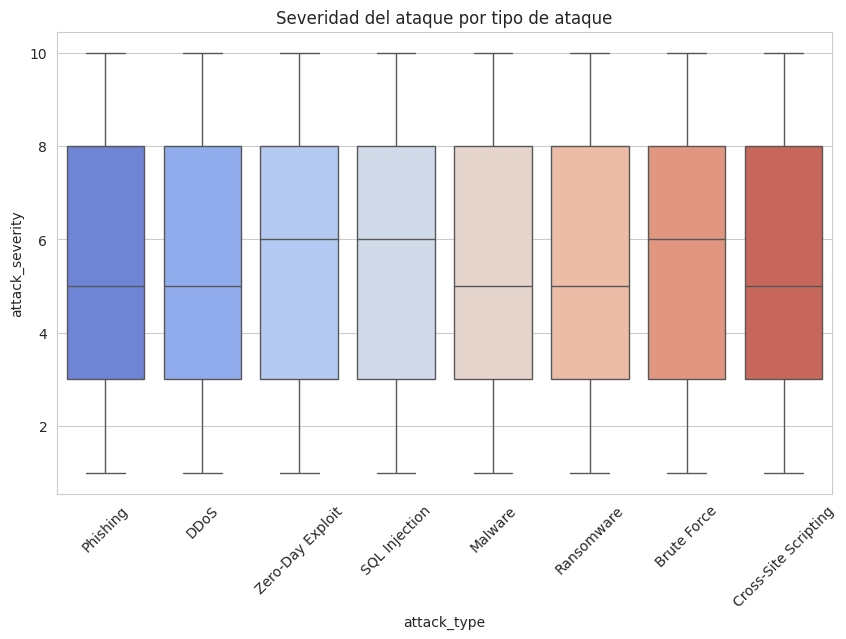

In [ ]:
#severidad por tipo de ataque
plt.figure(figsize=(10, 6))
sns.boxplot(data=cibe, x='attack_type', y='attack_severity', palette='coolwarm')
plt.title("Severidad del ataque por tipo de ataque")
plt.xticks(rotation=45)
plt.show()

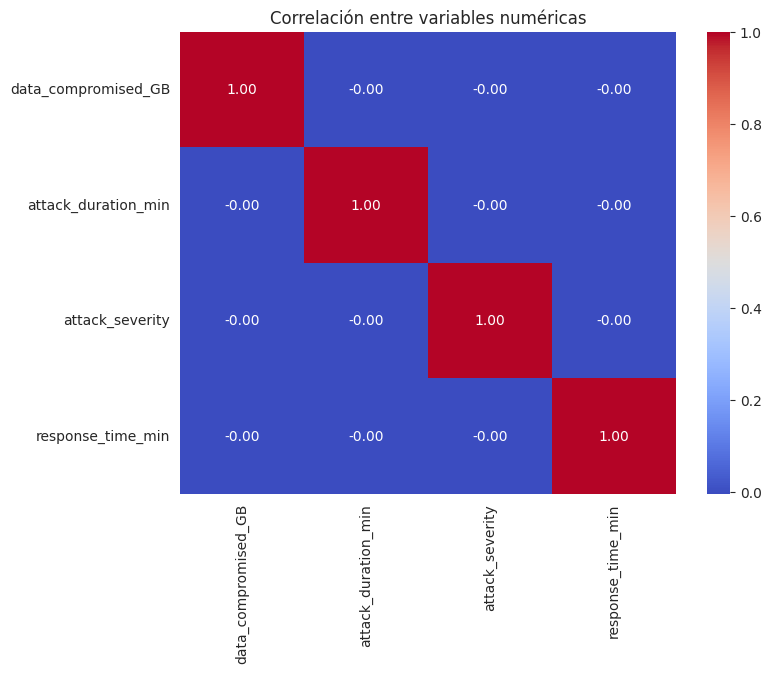

In [ ]:
#correlaciones entre variables numericas
plt.figure(figsize=(8, 6))
num_cols = cibe.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(cibe[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables numéricas")
plt.show()

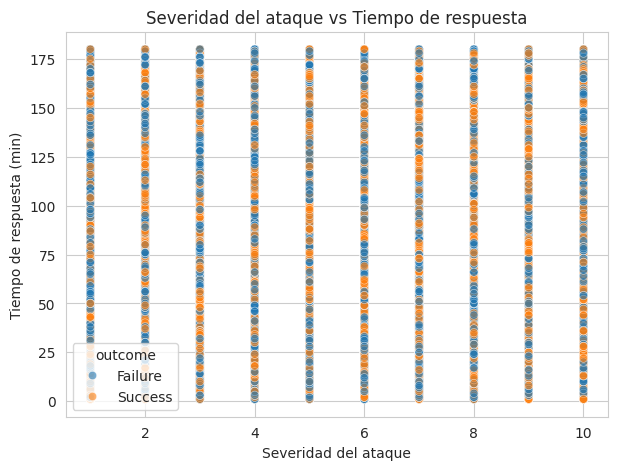

In [ ]:
#severidad vs tiempo de respuesta, depende si tuvo exito o fracasó
plt.figure(figsize=(7, 5))
sns.scatterplot(data=cibe, x='attack_severity', y='response_time_min', hue='outcome', alpha=0.6)
plt.title("Severidad del ataque vs Tiempo de respuesta")
plt.xlabel("Severidad del ataque")
plt.ylabel("Tiempo de respuesta (min)")
plt.show()

Transformaciones logarítmicas para escalar variables que tienen mucha dispersión (como data_compromised_GB, attack_duration_min, response_time_min).





In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [ ]:
cibe.clust= cibe.copy()

In [ ]:
#aplicamos logaritmo
for col in ['data_compromised_GB', 'attack_duration_min', 'response_time_min']:
    cibe.clust[f'log_{col}'] = np.log1p(cibe.clust[col])

In [ ]:
#seleccionamos solo columnas numericas
features = ['log_data_compromised_GB', 'log_attack_duration_min', 'log_response_time_min', 'attack_severity']

Se normalizaron las variables mediante StandardScaler para evitar que las diferencias de escal afecten el clustering.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cibe.clust[features])

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# DBSCAN sobre datos escalados (X_scaled de antes)
dbscan = DBSCAN(eps=0.5, min_samples=2)
cibe.clust['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

# Cantidad de clusters (sin contar el ruido -1)
n_clusters = len(set(cibe.clust['dbscan_cluster'])) - (1 if -1 in cibe.clust['dbscan_cluster'].values else 0)
print(f"Se encontraron {n_clusters} clusters con DBSCAN")

Se encontraron 77 clusters con DBSCAN


Se detecto 77 clusters, indicando sobreajuste o exceso de ruido.

Se ajustaron parámetros eps

In [ ]:
for eps in [0.3, 0.5, 0.7, 1.0]:
    db = DBSCAN(eps=eps, min_samples=2).fit(X_scaled)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Con eps={eps} se encontraron {n_clusters} clusters")


Con eps=0.3 se encontraron 961 clusters
Con eps=0.5 se encontraron 77 clusters
Con eps=0.7 se encontraron 12 clusters
Con eps=1.0 se encontraron 1 clusters


In [ ]:
from sklearn.metrics import silhouette_score

# Eliminar outliers (-1) antes de calcular silhouette, pero igualmente ya habiamos visto que no tenia
mask = cibe.clust['dbscan_cluster'] != -1
score = silhouette_score(X_scaled[mask], cibe.clust.loc[mask, 'dbscan_cluster'])
print(f"Silhouette Score (sin ruido): {score:.3f}")

Silhouette Score (sin ruido): 0.221


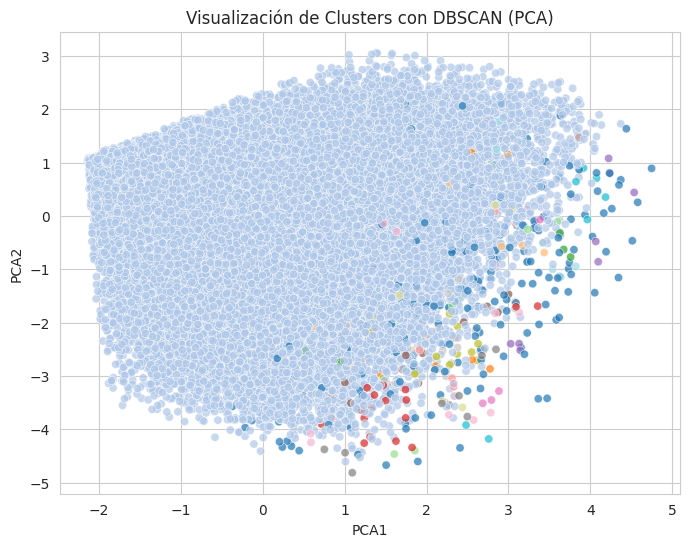

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reducir a 2D para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cibe.clust['PCA1'] = X_pca[:, 0]
cibe.clust['PCA2'] = X_pca[:, 1]

# Graficar clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cibe.clust, x='PCA1', y='PCA2', hue='dbscan_cluster', palette='tab20', alpha=0.7, legend=False)
plt.title("Visualización de Clusters con DBSCAN (PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

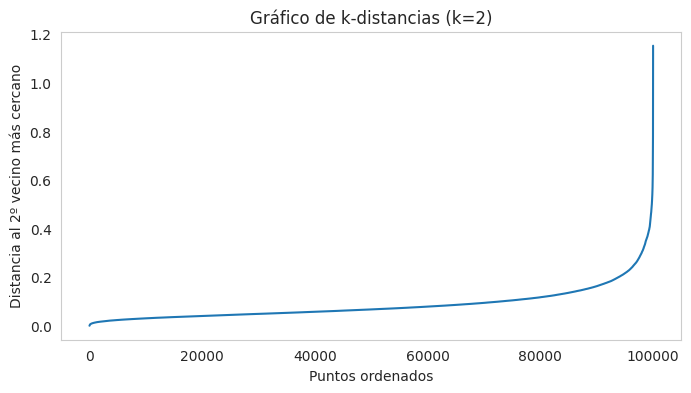

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calculamos la distancia al k-ésimo vecino más cercano (k = min_samples)
k = 2
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Ordenamos las distancias del k-ésimo vecino
distances = np.sort(distances[:, k-1])

# Graficamos
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.title(f"Gráfico de k-distancias (k={k})")
plt.xlabel("Puntos ordenados")
plt.ylabel(f"Distancia al {k}º vecino más cercano")
plt.grid()
plt.show()


Visualizacion con PCA

Graficamos

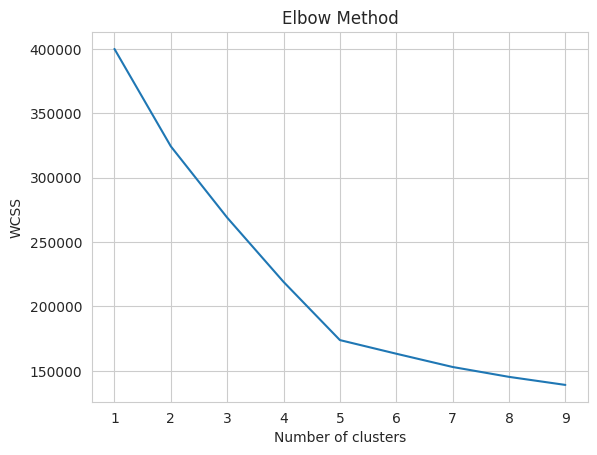

In [ ]:
#graficamos para obtener el codo
wcss =[]
for i in range (1,10):
    km = KMeans(n_clusters=i, init='k-means++',max_iter=300,random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Probamos con distintos k, pero queda mejor con PCA



In [ ]:
first_kmeans = KMeans(n_clusters=2, random_state=0)
sec_kmeans = KMeans(n_clusters=6, random_state=0)
thr_kmeans = KMeans(n_clusters=20, random_state=0)

In [ ]:
first_kmeans.fit(cibe.clust[features])
sec_kmeans.fit(cibe.clust[features])
thr_kmeans.fit(cibe.clust[features])

KMeans(n_clusters=20, random_state=0)

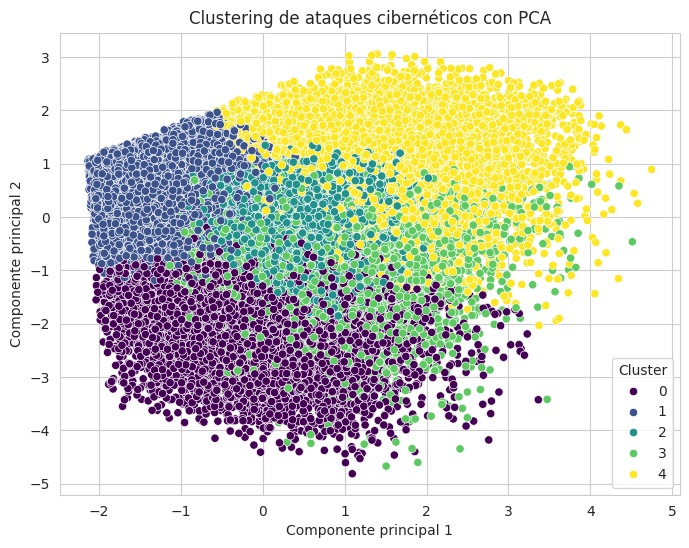

In [ ]:
from sklearn.cluster import KMeans

# Manejo de los valores faltante antes de escalar
cibe.clust['attack_severity'].fillna(cibe.clust['attack_severity'].mean(), inplace=True)
cibe.clust['response_time_min'].fillna(cibe.clust['response_time_min'].mean(), inplace=True)

# Eliminar filas con NaN en los features usadas para clustering
cibe.clust.dropna(subset=features, inplace=True)

# Reescalar los datos después del manejo de valores faltantes
X_scaled = scaler.fit_transform(cibe.clust[features])

# Elegimos 5 clusters para empezar (puede ajustarse)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cibe.clust['cluster'] = kmeans.fit_predict(X_scaled)

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cibe.clust, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title("Clustering de ataques cibernéticos con PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Cluster")
plt.show()

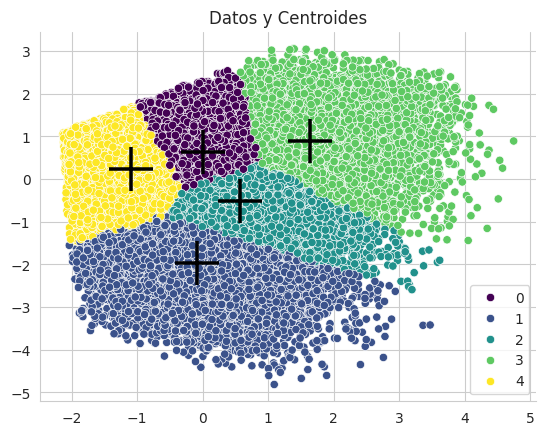

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Kmeans algorithm
# n_clusters: Numero of clusters. En nuestro caso vamos a elegir 5
# init: k-means++. Inicializacion de los centroides de manera inteligente
# max_iter: Maximo numero de iteraciones
# n_init: Numero de veces que k-means correra con diferentes inicializacion de centroides.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=42)

# Handle missing values before scaling
cibe.clust['attack_severity'].fillna(cibe.clust['attack_severity'].mean(), inplace=True)
cibe.clust['response_time_min'].fillna(cibe.clust['response_time_min'].mean(), inplace=True)

# Drop rows with NaN in the features used for clustering
cibe.clust.dropna(subset=features, inplace=True)

# Re-scale the data after handling missing values
X_scaled = scaler.fit_transform(cibe.clust[features])

#reducimos a 2 componentes principales para graficar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit y predict
y_means_final = kmeans.fit_predict(X_pca)

# Obtenemos los centroides
centroids = kmeans.cluster_centers_

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue= y_means_final, palette='viridis')
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='black', marker="+", s=1000)
plt.title('Datos y Centroides')
sns.despine()
plt.show()

In [ ]:
# algoritmo Kmeans
# n_clusters: Numero of clusters. En nuestro caso vamos a elegir 5
# init: k-means++. Inicializacion de los centroides de manera inteligente
# max_iter: Maximo numero de iteraciones
# n_init: Numero de veces que k-means correra con diferentes inicializacion de centroides.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=42)

# Fit y predict
y_means_final = kmeans.fit_predict(X_pca)

In [ ]:
from sklearn.cluster import KMeans

# Entrenamos el modelo con K clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Obtenemos los centroides
centroids = kmeans.cluster_centers_

# Convertir a DataFrame para verlo mejor
centroid_df = pd.DataFrame(centroids, columns=features)
print(centroid_df)



   log_data_compromised_GB  log_attack_duration_min  log_response_time_min  \
0                -0.002248                -0.003797               0.361135   
1                 0.000467                 0.007516               0.364203   
2                 0.004385                -0.009314              -1.796361   

   attack_severity  
0         0.890758  
1        -0.888761  
2         0.011264  


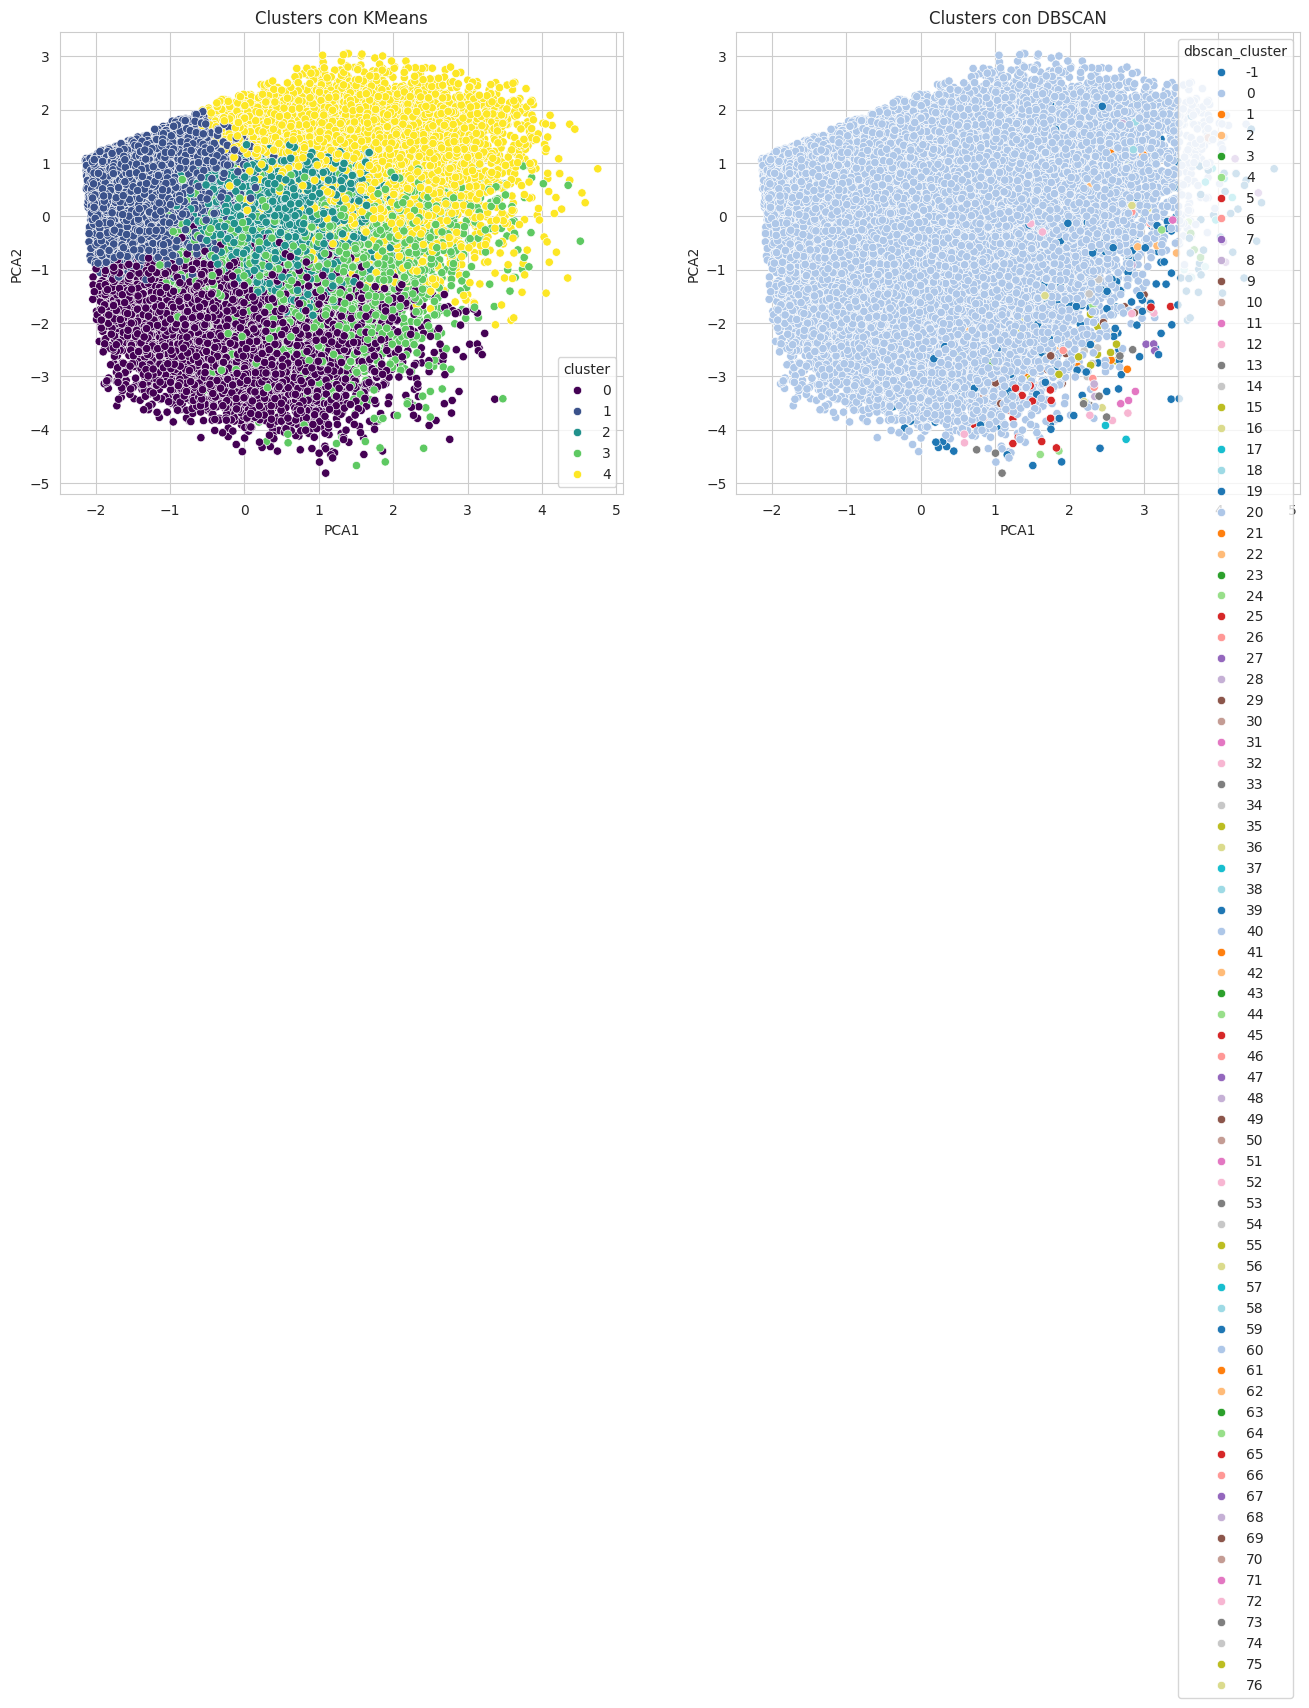

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# KMeans
sns.scatterplot(data=cibe.clust, x='PCA1', y='PCA2', hue='cluster', palette='viridis', ax=axs[0])
axs[0].set_title("Clusters con KMeans")

# DBSCAN
sns.scatterplot(data=cibe.clust, x='PCA1', y='PCA2', hue='dbscan_cluster', palette='tab20', ax=axs[1])
axs[1].set_title("Clusters con DBSCAN")

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# KMeans
score_kmeans = silhouette_score(X_scaled, cibe.clust['cluster'])
print(f"Silhouette Score para KMeans: {score_kmeans:.4f}")

# DBSCAN (sin ruido)
mask = cibe.clust['dbscan_cluster'] != -1
if mask.sum() > 1:
    score_dbscan = silhouette_score(X_scaled[mask], cibe.clust.loc[mask, 'dbscan_cluster'])
    print(f"Silhouette Score para DBSCAN (sin ruido): {score_dbscan:.4f}")
else:
    print("DBSCAN tiene demasiado ruido para calcular Silhouette Score.")


Silhouette Score para KMeans: 0.2728
Silhouette Score para DBSCAN (sin ruido): 0.2210


Conclusiones

KMeans fue más útil para segmentar los datos de forma clara y reproducible.

DBSCAN resultó sensible a los parámetros y generó mucho ruido inicialmente.

La visualización en PCA ayudó a validar los resultados de forma intuitiva.

Este análisis puede ayudar a los equipos de ciberseguridad a reaccionar más rápido y con mejor información.

In [ ]:
!pip install hdbscan


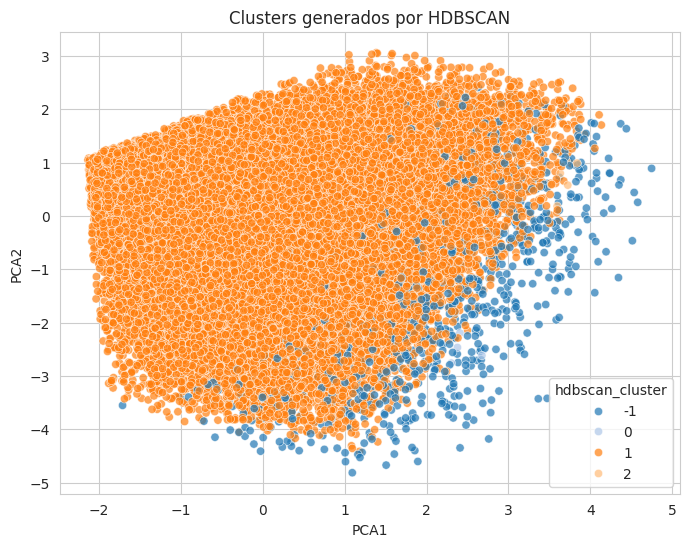

In [ ]:
import hdbscan

# Ajustar el modelo
hdb = hdbscan.HDBSCAN(min_cluster_size=5)
cibe.clust['hdbscan_cluster'] = hdb.fit_predict(X_scaled)

# Visualizar en PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=cibe.clust,
    x='PCA1', y='PCA2',
    hue='hdbscan_cluster',
    palette='tab20',
    legend='full',
    alpha=0.7
)
plt.title("Clusters generados por HDBSCAN")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

mask = cibe.clust['hdbscan_cluster'] != -1
if mask.sum() > 1:
    score = silhouette_score(X_scaled[mask], cibe.clust.loc[mask, 'hdbscan_cluster'])
    print(f"Silhouette Score HDBSCAN (sin ruido): {score:.4f}")
else:
    print("Demasiado ruido para evaluar.")


Silhouette Score HDBSCAN (sin ruido): 0.3964


HDBSCAN

También se probó el algoritmo HDBSCAN, que combina lo mejor de DBSCAN y clustering jerárquico. Este método permitió:

Detectar agrupamientos de **distinta densidad**, que otros métodos no captaban.
Evitar la necesidad de elegir manualmente un `eps`. Identificar outliers con mayor precisión.

La visualización mostró clusters más coherentes, y el Silhouette Score obtenido fue de `0.03964`, superior a DBSCAN tradicional.

Este método resulta prometedor para datos reales con ruido o variabilidad alta.
